![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [29]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [31]:
import os

In [32]:
os.chdir(path='/content/drive/My Drive/Colab Notebooks/CV_PROJECT2/')

In [33]:
# To list project files that are used and present in the folder
os.listdir()

['Aligned Face Dataset from Pinterest.zip',
 'vgg_face_weights.h5',
 'Questions - Project 2 - Advanced Computer Vision - Face recognition.ipynb',
 'PINS',
 'pins',
 'embeddings.npy']

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [34]:
from zipfile import ZipFile

In [ ]:
with ZipFile(file='Aligned Face Dataset from Pinterest.zip',mode='r') as zf:
  zf.extractall()

In [ ]:
# To list project files that are used and present in the folder
os.listdir()

['Aligned Face Dataset from Pinterest.zip',
 'vgg_face_weights.h5',
 'PINS',
 'pins',
 'embeddings.npy',
 'Questions - Project 2 - Advanced Computer Vision - Face recognition.ipynb']

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [35]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [36]:
type(metadata)

numpy.ndarray

In [37]:
metadata.shape

(10770,)

In [38]:
len(metadata)

10770

In [39]:
print(metadata[8720].base)
print(metadata[8720].name)
print(metadata[8720].file)
metadata[8720]

PINS
pins_gal gadot face
gal gadot face29.jpg


PINS/pins_gal gadot face/gal gadot face29.jpg

### Define function to load image
- Define a function to load image from the metadata

In [40]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [41]:
import matplotlib.pyplot as plt

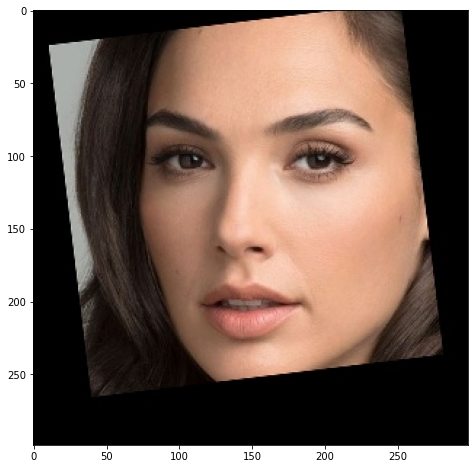

In [42]:
img=load_image(metadata[8720].image_path())
plt.figure(figsize=(8,8))
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [44]:
model = vgg_face()
model.load_weights(filepath='/content/drive/My Drive/Colab Notebooks/CV_PROJECT2/vgg_face_weights.h5')

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)    

### Get vgg_face_descriptor

In [46]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [47]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[8720].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [48]:
from tqdm import tqdm

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in tqdm(enumerate(metadata)):
  img_path = metadata[i].image_path()
  img = load_image(img_path)
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings[i]=embedding_vector

10770it [1:05:55,  2.72it/s]


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
#Saving the embeddings into npy file so can re-use it without the need of running the predict func
np.save(file='/content/drive/My Drive/Colab Notebooks/CV_PROJECT2/embeddings.npy', arr=embeddings, allow_pickle=True)

In [49]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

In [50]:
# Loading the embeddings that are saved
embeddings=np.load(file='/content/drive/My Drive/Colab Notebooks/CV_PROJECT2/embeddings.npy',allow_pickle=True)

In [51]:
embeddings.shape

(10770, 2622)

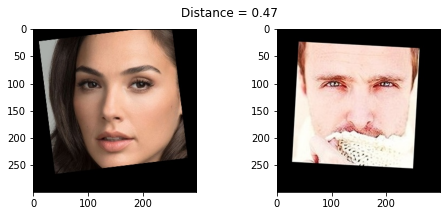

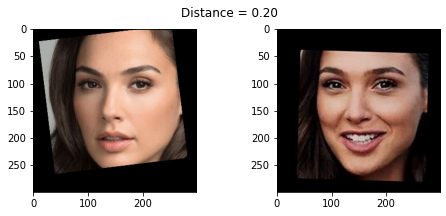

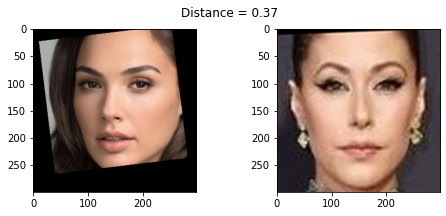

In [52]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(8720, 3)
show_pair(8720, 8713)
show_pair(8720, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [53]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# train and test split
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_enc=label_encoder.transform(y_train)
y_test_enc=label_encoder.transform(y_test)

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [55]:
# Standarize features
from sklearn.preprocessing import StandardScaler

std_scale=StandardScaler()
std_scale= std_scale.fit(X_train)
X_train_scaled= std_scale.transform(X_train)
X_test_scaled= std_scale.transform(X_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [56]:
from sklearn.decomposition import PCA

pca=PCA(n_components=128)
pca=pca.fit(X_train_scaled)
#X_pca_scaled=pca.transform(X_scaled)
print("Explained Variance ratios of each PCA: ",pca.explained_variance_ratio_)
print("Cummulative sum of Variance ratios for PCAs: ",np.cumsum(pca.explained_variance_ratio_))

Explained Variance ratios of each PCA:  [0.13588907 0.05397996 0.0399038  0.03685076 0.0340078  0.03130052
 0.0259161  0.02335011 0.0210263  0.01942921 0.01818738 0.01701085
 0.01657934 0.01562091 0.01414857 0.01363428 0.01303946 0.01227737
 0.01155233 0.01134523 0.01092548 0.01055393 0.00961389 0.00936725
 0.00914728 0.00883087 0.00833982 0.0076841  0.0076045  0.00736519
 0.00699927 0.00664536 0.00633479 0.00620419 0.00572142 0.00535153
 0.00529045 0.0051194  0.00505976 0.00482456 0.00438459 0.00434225
 0.0039447  0.00393708 0.00370292 0.00356456 0.00340717 0.00334461
 0.00328386 0.00319783 0.00313175 0.00307634 0.00290435 0.00282541
 0.00279101 0.00273295 0.00268621 0.00261383 0.00253895 0.00248398
 0.00237262 0.00231873 0.00225091 0.00217072 0.00210901 0.00205765
 0.00200232 0.00194651 0.00187787 0.00184866 0.00182581 0.00179021
 0.00174437 0.00173486 0.00169883 0.00165648 0.00163982 0.00161589
 0.00157053 0.00155136 0.00152514 0.00149543 0.00146945 0.00143467
 0.00140348 0.00137595

In [57]:
# Obtaining PCA attributes for train and test set
X_train_pca_scaled=pca.transform(X_train_scaled)
X_test_pca_scaled=pca.transform(X_test_scaled)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model=SVC()
svc_model=svc_model.fit(X_train_pca_scaled,y_train_enc)
y_train_pred=svc_model.predict(X_train_pca_scaled)
y_test_pred=svc_model.predict(X_test_pca_scaled)
print("Training data accuracy: ",accuracy_score(y_train_enc,y_train_pred))
print("Testing data accuracy: ",accuracy_score(y_test_enc,y_test_pred))

Training data accuracy:  0.9962394233782513
Testing data accuracy:  0.9590643274853801


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

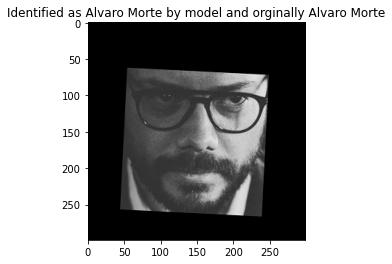

In [70]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_test_pred[example_idx]
example_identity = label_encoder.inverse_transform(np.expand_dims(example_prediction,axis=0))[0][5:]
example_orig_identity = metadata[test_idx][example_idx].name[5:]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity} by model and orginally {example_orig_identity}');

#### Picking up test images of a particular celebrity and verifying if model has identified correctly in all pics or not. <br>For Testing am considering celebrity : gal gadot.

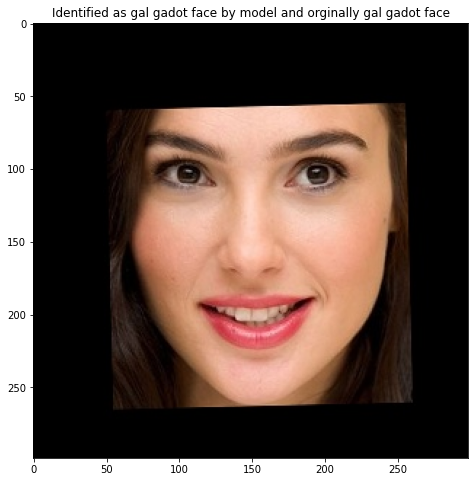

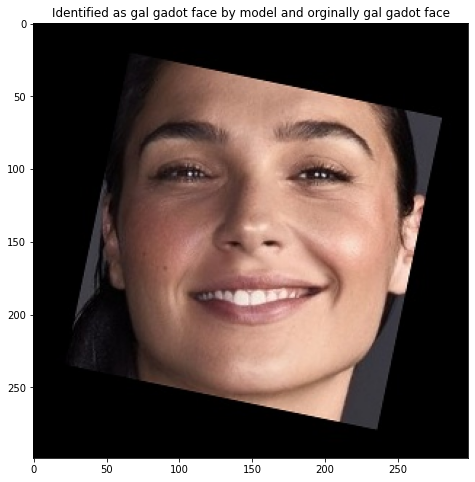

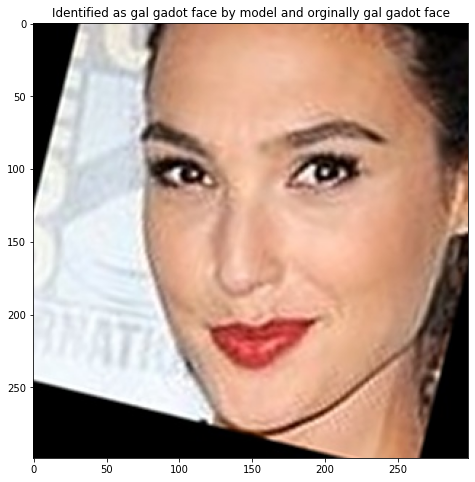

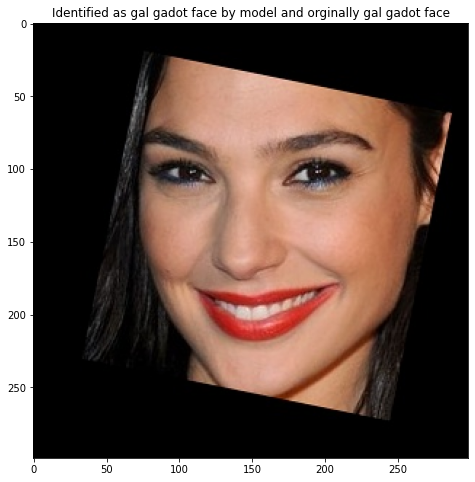

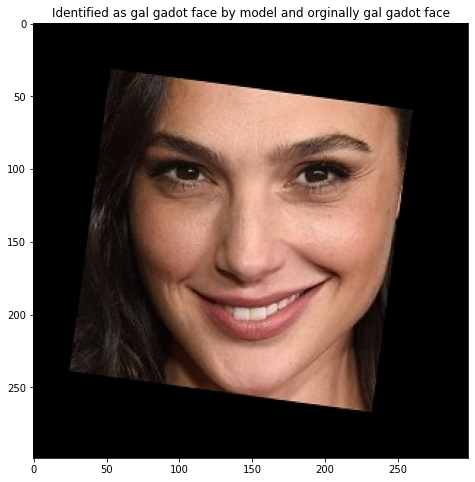

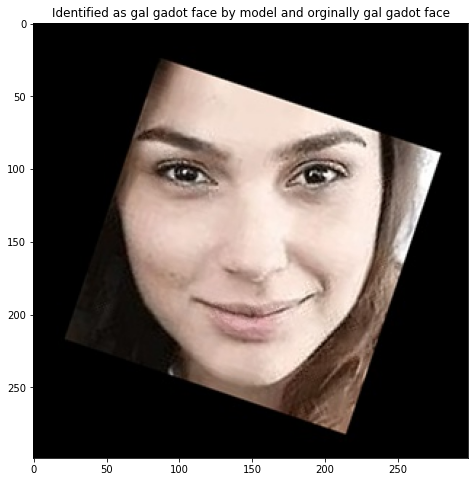

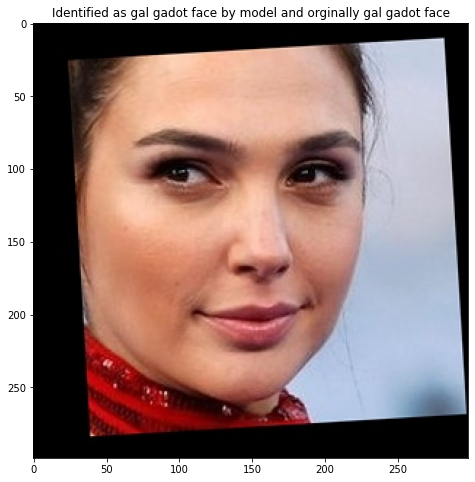

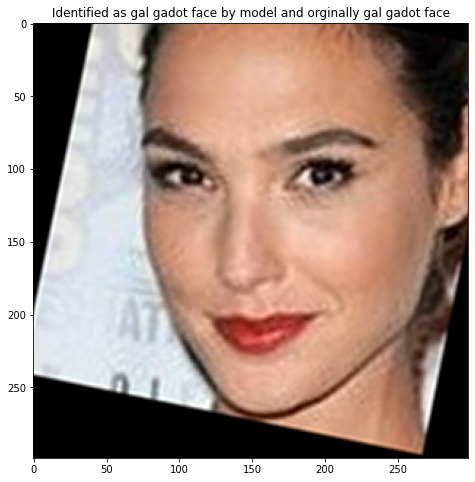

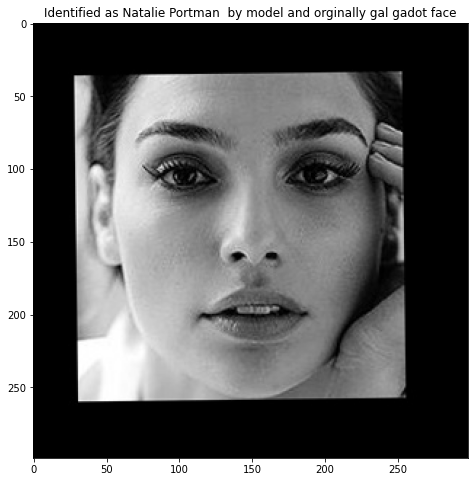

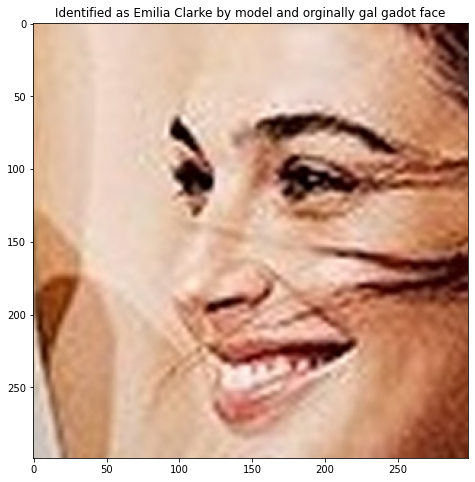

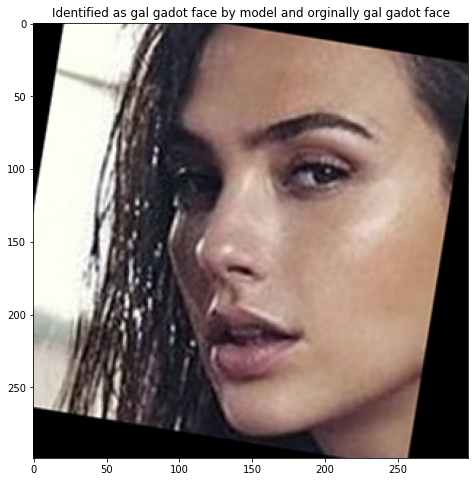

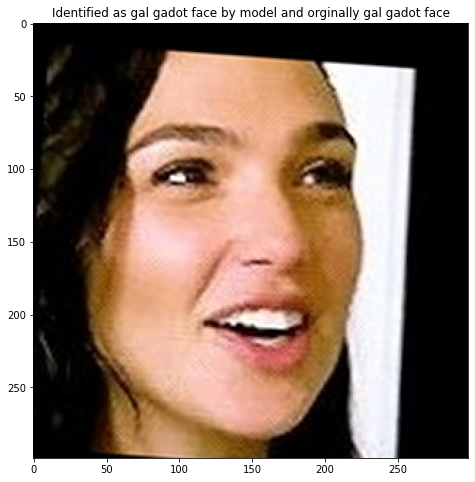

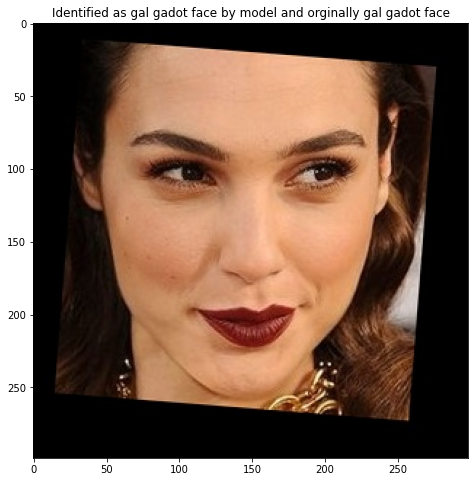

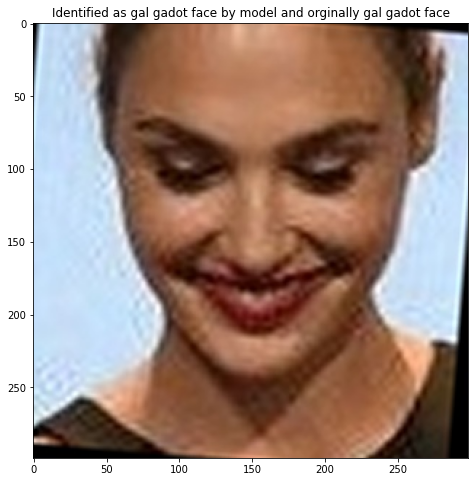

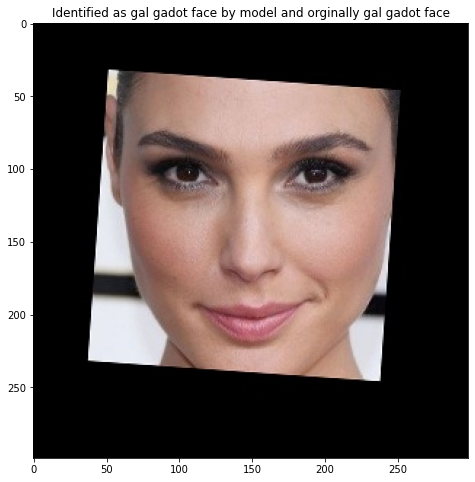

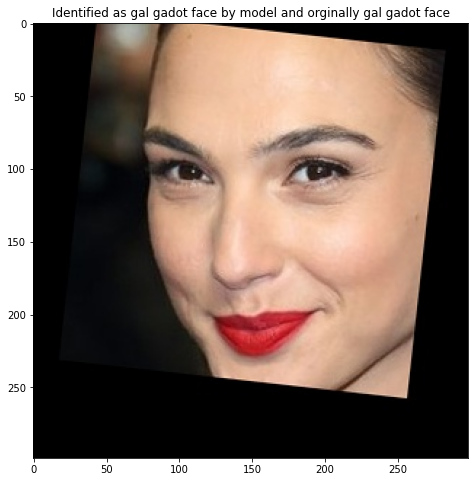

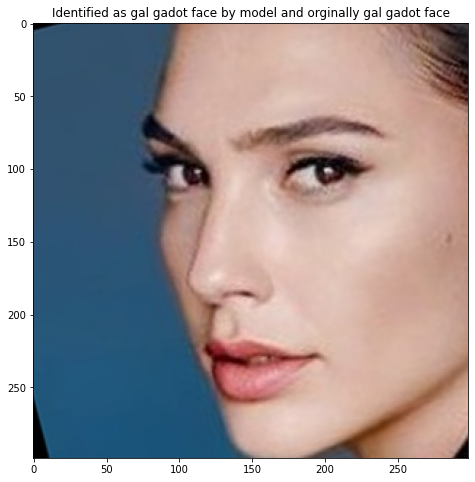

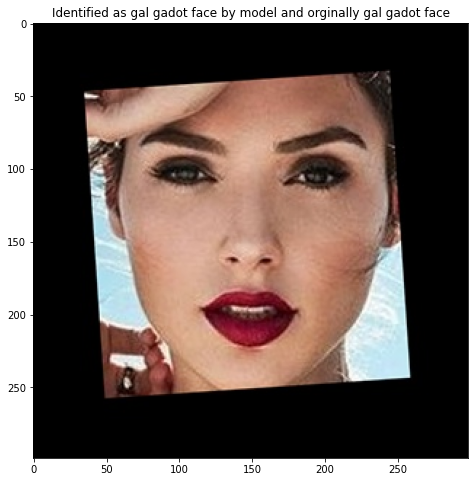

In [73]:
import warnings
# Suppress LabelEncoder warning
#warnings.filterwarnings('ignore')

for i in np.where(y_test=='pins_gal gadot face')[0]:
  example_idx = i

  example_image = load_image(metadata[test_idx][example_idx].image_path())
  example_prediction = y_test_pred[example_idx]
  example_identity = label_encoder.inverse_transform(np.expand_dims(example_prediction,axis=0))[0][5:]
  example_orig_identity = metadata[test_idx][example_idx].name[5:]

  plt.figure(figsize=(8,8))
  plt.imshow(example_image)
  plt.title(f'Identified as {example_identity} by model and orginally {example_orig_identity}');

### Conclusion:

1. VGG Net model is used in Face Recognition.
2. PCA is applied to reduce dimension.
3. SVC is applied on top of reduced dimensions to do the face recognition.
4. Training accuracy is 99.6% above and test accuracy is 95.9% which is really good.